Stock Market Price Prediction Model

Project Members: 23L-2572 , 23L-2517, 23L-2640

Importing Pandas Library

In [1]:
import pandas as pd

Reading the DataSet, Using AAPL Stock Price Data From Kaggle

In [2]:
stock_data = pd.read_csv('AAPL.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

Handling Missing Data

In [3]:
#Checking for Missing Data
print(stock_data.isnull())

        Date   Open   High    Low  Close  Adj Close  Volume
0      False  False  False  False  False      False   False
1      False  False  False  False  False      False   False
2      False  False  False  False  False      False   False
3      False  False  False  False  False      False   False
4      False  False  False  False  False      False   False
...      ...    ...    ...    ...    ...        ...     ...
10404  False  False  False  False  False      False   False
10405  False  False  False  False  False      False   False
10406  False  False  False  False  False      False   False
10407  False  False  False  False  False      False   False
10408  False  False  False  False  False      False   False

[10409 rows x 7 columns]


In [4]:
#incase of missing data, filling forward filling 
numeric_data = stock_data.select_dtypes(include='number')
stock_data[numeric_data.columns] = numeric_data.fillna(numeric_data.ffill())
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


Handling Duplicate Data Instances

In [5]:
#removing duplicates if any
stock_data.drop_duplicates(keep='last' , inplace = True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


Scaling / Normalizing the Data

In [6]:
#Scaling
stock_data[numeric_data.columns] = (stock_data[numeric_data.columns] - stock_data[numeric_data.columns].min()) / (stock_data[numeric_data.columns].max() - stock_data[numeric_data.columns].min())
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1,1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
2,1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
3,1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
4,1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897
...,...,...,...,...,...,...,...
10404,2022-03-18,0.878848,0.899065,0.891886,0.900913,0.902067,0.016620
10405,2022-03-21,0.895279,0.909290,0.910036,0.908607,0.909770,0.012910
10406,2022-03-22,0.906233,0.926076,0.920646,0.927512,0.928698,0.010986
10407,2022-03-23,0.919816,0.943682,0.935947,0.935151,0.936346,0.013213


Exploratory Data Analysis (EDA)

In [7]:
stock_data[numeric_data.columns].describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000
mean,0.076187,0.076889,0.076841,0.076487,0.073247,0.044758
std,0.165238,0.166848,0.166610,0.165924,0.164582,0.045722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001272,0.001303,0.001259,0.001276,0.001081,0.016810
50%,0.002295,0.002340,0.002294,0.002306,0.001917,0.029639
75%,0.077600,0.078269,0.078150,0.077802,0.066852,0.055596
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from scipy.stats import skew
stock_data[numeric_data.columns].skew()
#since we are dealing with timeseries data so we will not remove outliers if any

Open         3.231091
High         3.234319
Low          3.228021
Close        3.231544
Adj Close    3.324601
Volume       3.536923
dtype: float64

In [9]:
#correlation analysis
stock_data[numeric_data.columns].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999945,0.999928,0.999861,0.999494,-0.189987
High,0.999945,1.000000,0.999910,0.999931,0.999589,-0.189387
Low,0.999928,0.999910,1.000000,0.999929,0.999547,-0.190955
Close,0.999861,0.999931,0.999929,1.000000,0.999641,-0.190182
Adj Close,0.999494,0.999589,0.999547,0.999641,1.000000,-0.193284
Volume,-0.189987,-0.189387,-0.190955,-0.190182,-0.193284,1.000000


Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Line Chart

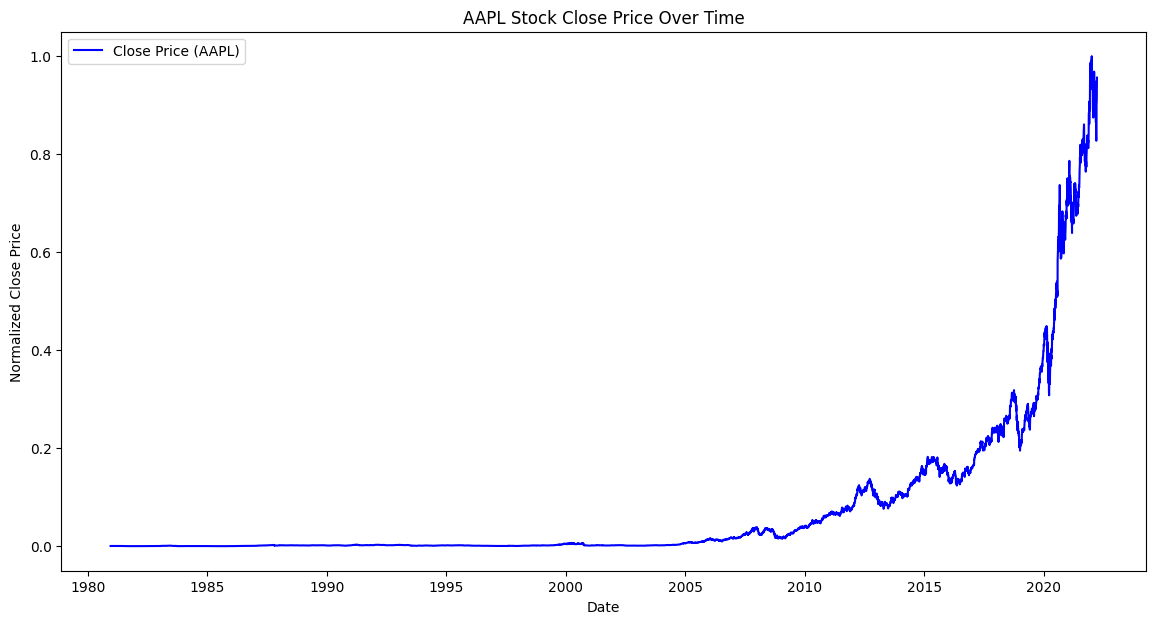

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price (AAPL)', color='blue')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.title('AAPL Stock Close Price Over Time')
plt.legend()
plt.show()

Line chart with 50 day moving average

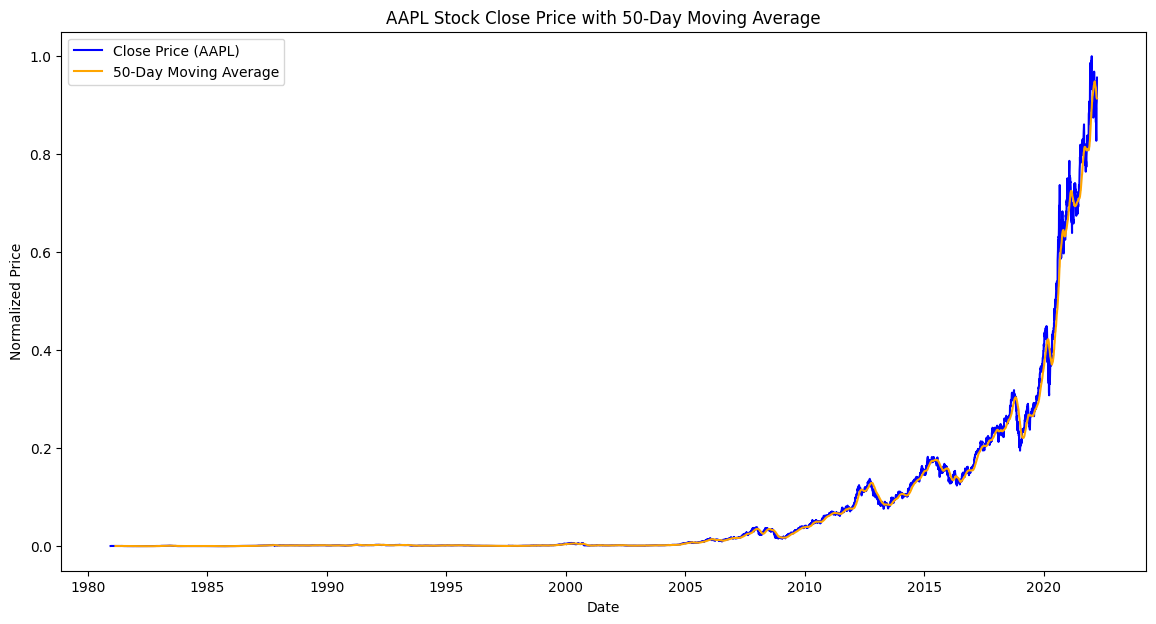

In [12]:
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price (AAPL)', color='blue')
plt.plot(stock_data['Date'], stock_data['50_MA'], label='50-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('AAPL Stock Close Price with 50-Day Moving Average')
plt.legend()
plt.show()

Histrogram of the data for distribution
However we will not make the data normal symmetry because we need the data as it is for proper predictions

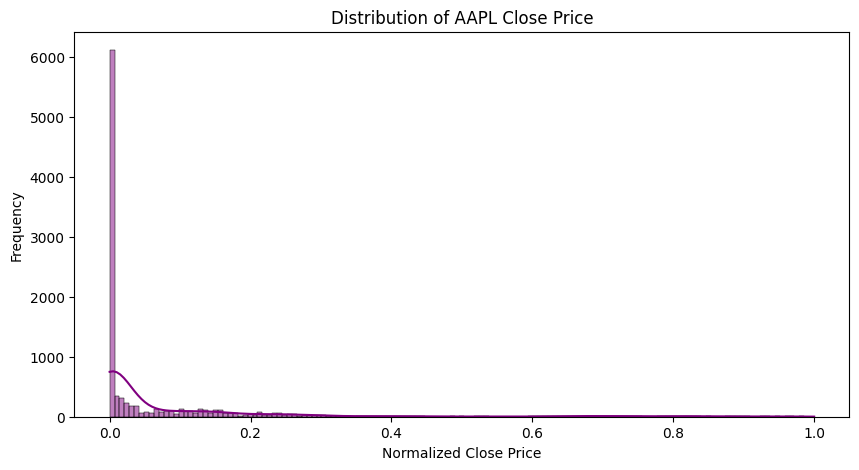

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['Close'], kde=True, color='purple')
plt.title('Distribution of AAPL Close Price')
plt.xlabel('Normalized Close Price')
plt.ylabel('Frequency')
plt.show()

Box plot visualization of the data

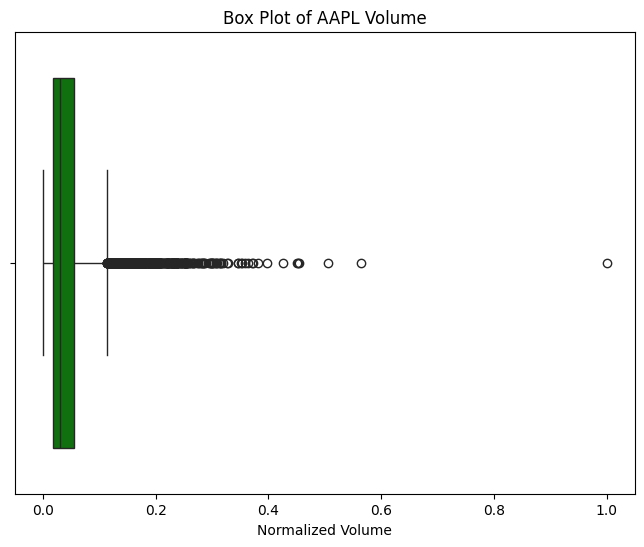

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=stock_data['Volume'], color='green')
plt.title('Box Plot of AAPL Volume')
plt.xlabel('Normalized Volume')
plt.show()

Correlation Visualization of the data pairwise

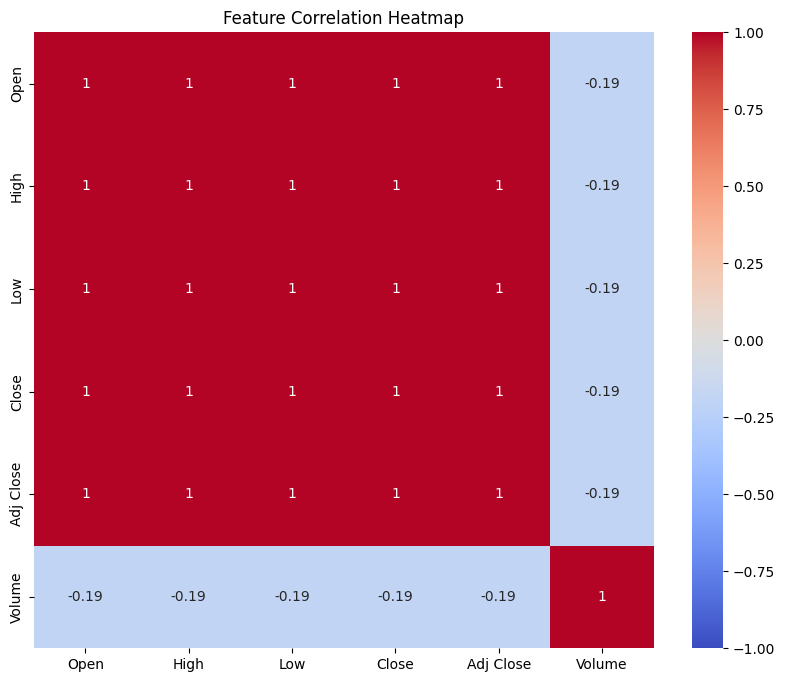

In [15]:
correlation_matrix = stock_data[numeric_data.columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

Scatter Plot for the correlation of the data 

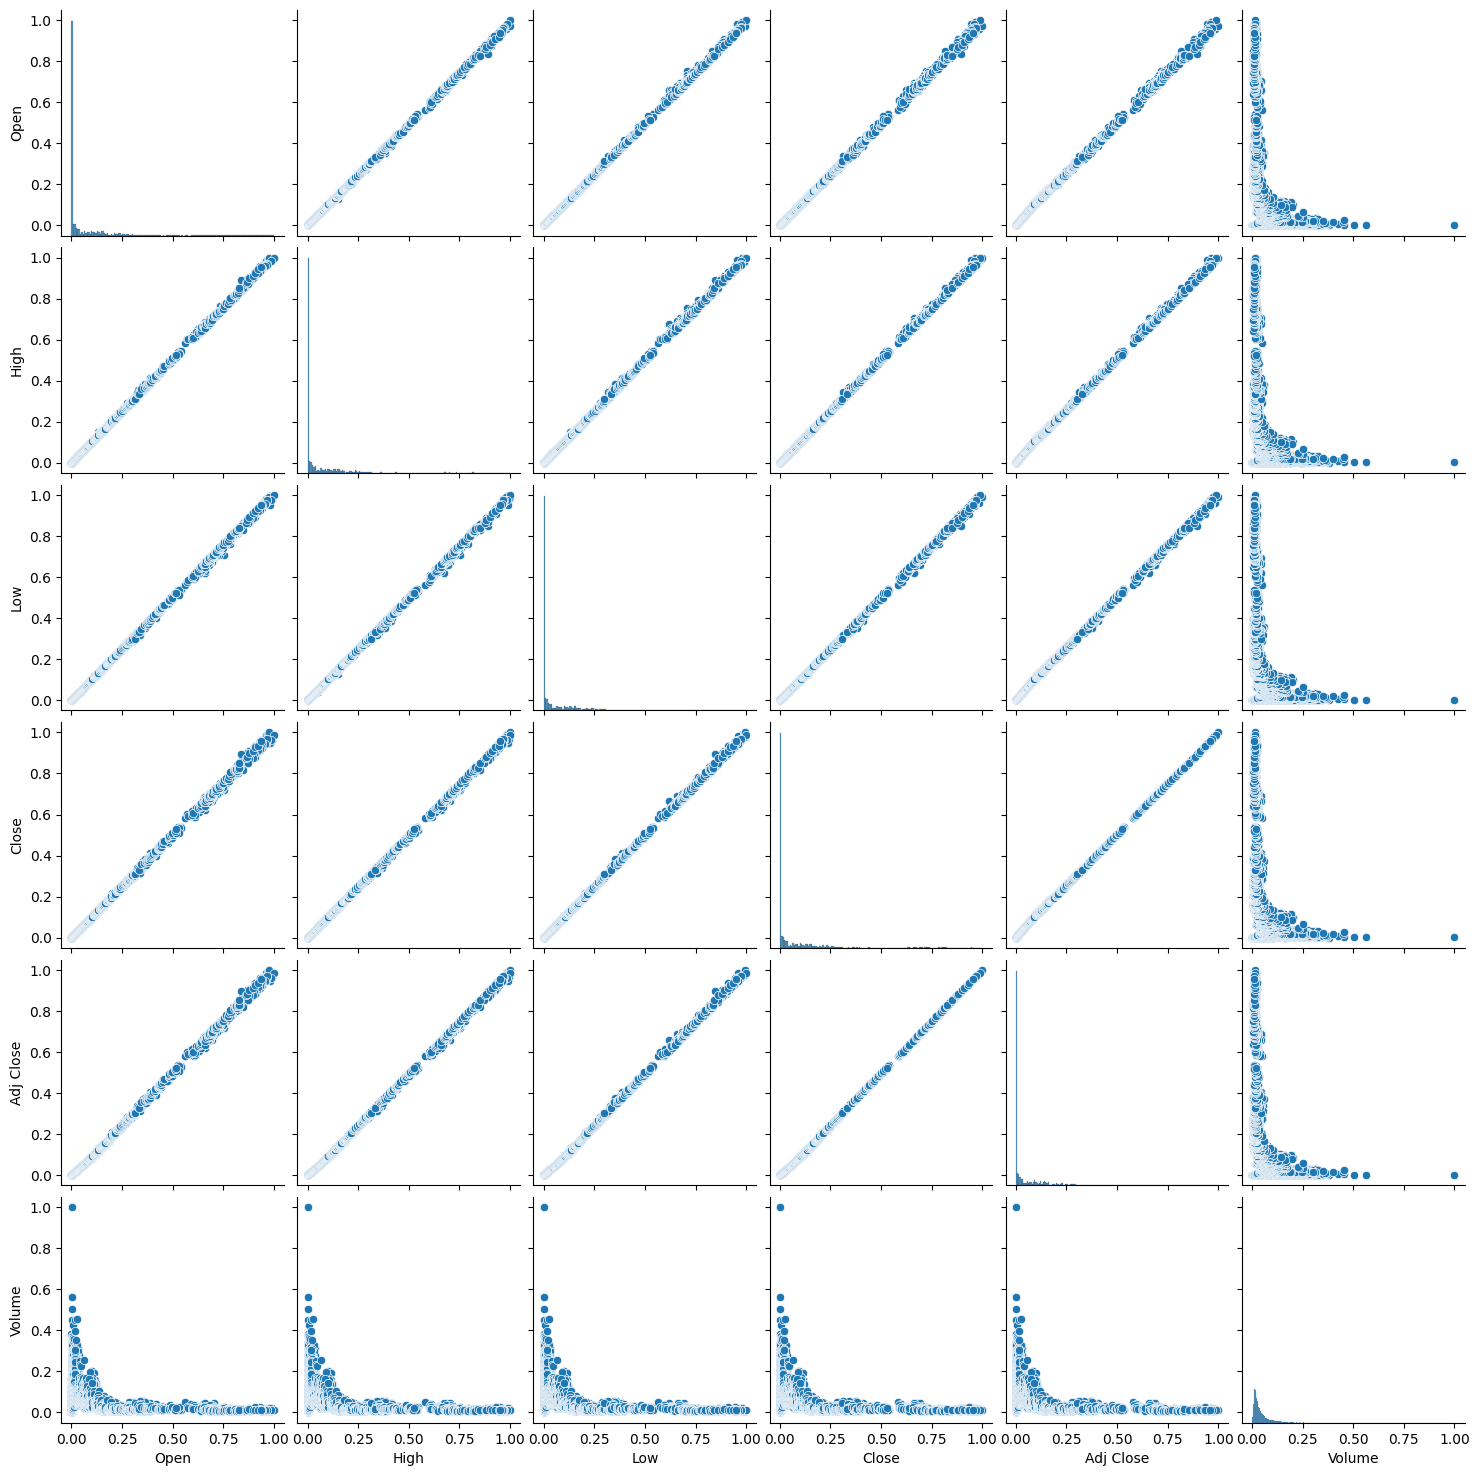

In [16]:
sns.pairplot(stock_data[numeric_data.columns])
plt.show()

Exporting Cleaned Dataset

In [17]:
stock_data.to_csv("Cleaned Stock Data.csv")